In [25]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd

from Illinois_network import *

In [32]:
path = 'data/location'

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

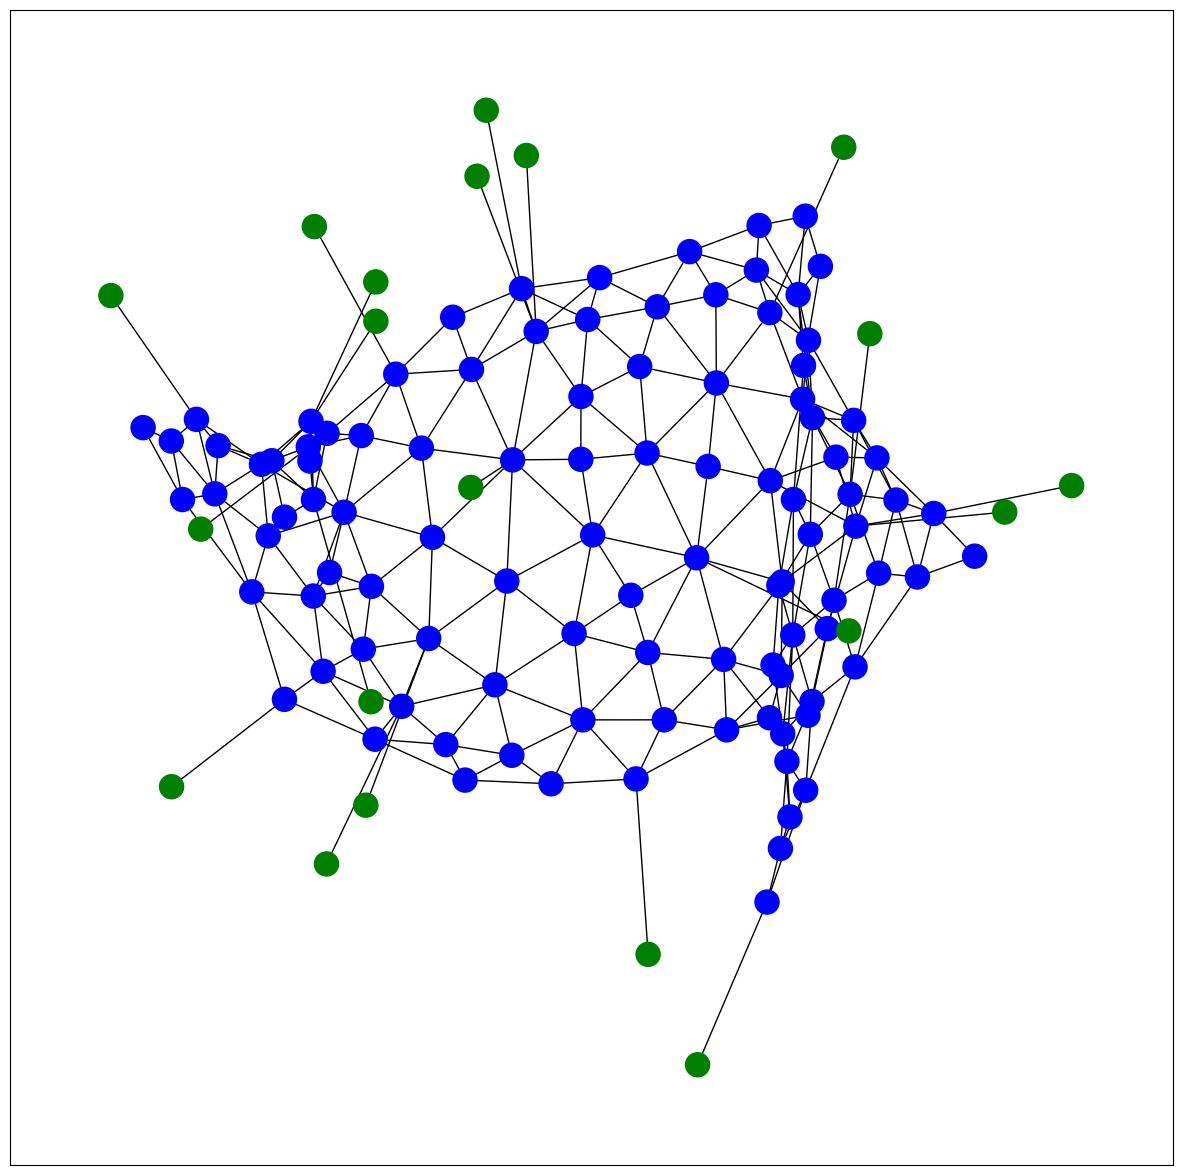

In [33]:
pos = nx.spring_layout(CG)
node_colors = ['blue' if isinstance(node, County) else 'green' for node in CG.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(CG, pos, node_color=node_colors, ax=ax)
nx.draw_networkx_edges(CG, pos, ax=ax)
plt.show()

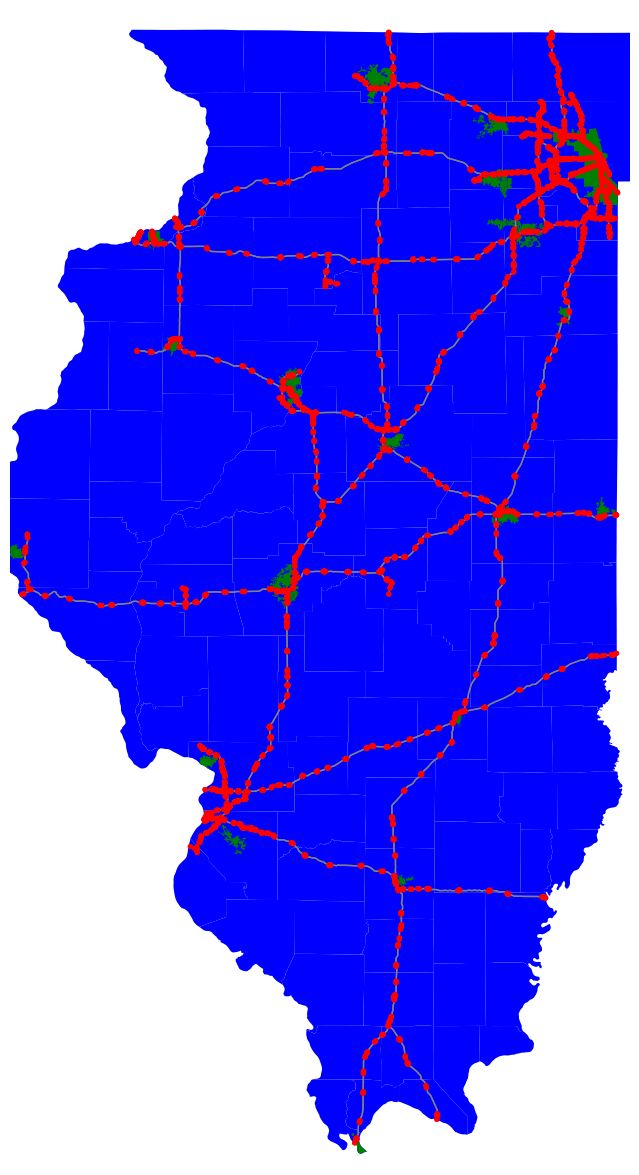

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [34]:
counties = handler['C']
cities = handler['c']

fig, ax = plt.subplots(figsize=(15, 15))
Cgdf = gpd.GeoDataFrame({'geometry': [counties[county].geometry for county in counties]})
cgdf = gpd.GeoDataFrame({'geometry': [cities[city].geometry for city in cities]})

Cgdf.plot(ax=ax, color='blue')
cgdf.plot(ax=ax, color='green')

ox.plot_graph(highways, ax=ax, node_color='r', edge_color='gray')

# Old

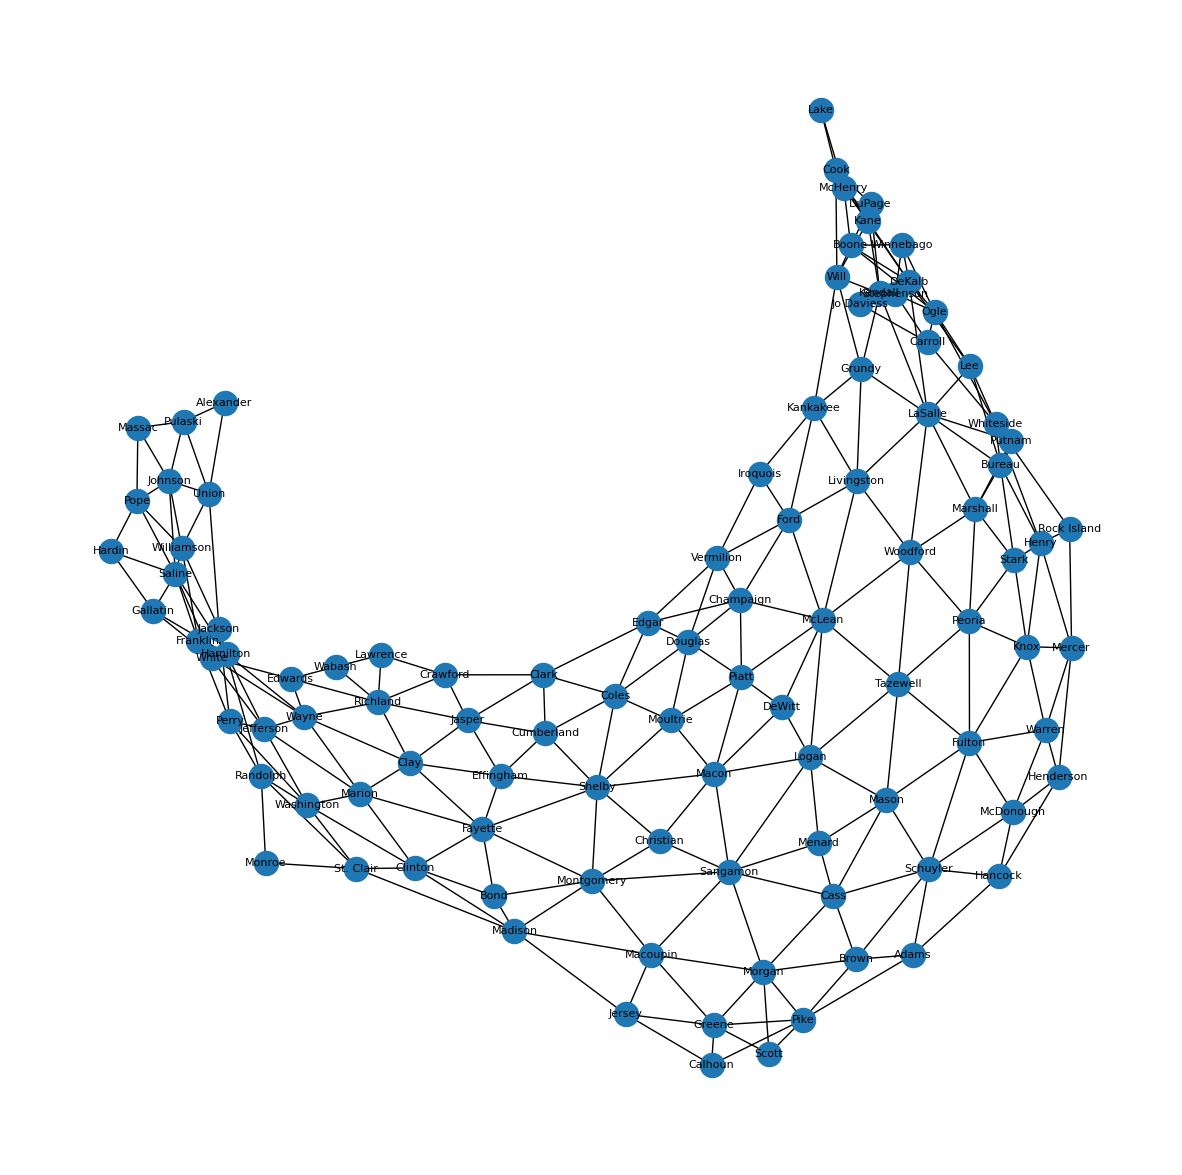

In [38]:
# labels = {node: handler[node.name].name for node in CG.nodes()}
# fig, ax = plt.subplots(figsize=(15, 15))
# nx.draw(CG, pos, ax=ax)
# nx.draw_networkx_labels(CG, pos, labels=labels, font_size=8, ax=ax)

# fig, ax = plt.subplots(figsize=(15,8))
# G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
# nx.draw(G, with_labels=True)
# plt.show()

<Axes: >

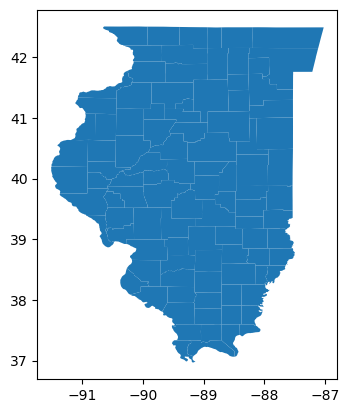

In [26]:
# gdf = gpd.GeoDataFrame({'geometry': [handler[county].geometry for county in handler]})
# gdf.plot()

Test = County(0, 0, 0, 100, 'Test')
print(Test)

In [46]:
# counties_set = set(counties['origin'])  # Using set to remove redundancies

In [52]:
# population_dict = open('data/county_populations.json', 'r')
# counties_population = json.load(population_dict)

In [ ]:
# counties = pd.read_csv('data/counties_parsed.csv')
#
# fig, ax = plt.subplots(figsize=(15,8))
# G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
# nx.draw(G, with_labels=True)
# plt.show()